# Project Title
Eastman Synthetic Operations Analysis & Product Segment Prediction

## Problem Statement

Eastman operates multiple chemical plants across various global regions, producing a wide range of synthetic products. The company seeks insights into how different factors such as region, product segment, plant capacity, and R&D spending influence sales and revenue.

Additionally, they want to leverage historical operational data to predict which product segment a plant is likely to produce, enabling better planning and resource allocation.

## Objective / Goals

- Perform detailed exploratory data analysis (EDA) on Eastman’s synthetic operations dataset.
- Analyze regional and product-wise revenue distribution.
- Detect trends and correlations among variables like sales, emissions, and satisfaction scores.
- Identify and handle missing values and outliers.
- Build and evaluate a machine learning model to predict product segments based on numerical features.
- Generate insights to support data-driven decision-making.

## Project Description

This project analyzes a large-scale synthetic product dataset from Eastman Chemical Company. The data includes over 1 million records from various global plants and contains features such as region, plant location, product segment, revenue, emissions, customer satisfaction, and more.

Using Python and data science techniques, the project performs:

- Data Cleaning & Preprocessing
- Exploratory Data Analysis (EDA)
- Correlation & Outlier Detection
- Time-Series Trend Analysis
- Machine Learning Modeling (Random Forest Classifier)

The goal is to generate actionable insights about regional production trends and use ML to predict product segments based on operational metrics. This helps in making data-driven decisions for optimizing production, improving revenue forecasting, and supporting strategic planning.
    


# Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load Dataset

In [4]:
df = pd.read_csv("Eastman_Synthetic_10Lakh.csv")
df

,Year,Month,Region,Product_Segment,Plant,Monthly_Sales,Revenue,CO2_Emissions_Tons,R&D_Spending,Revenue_Growth,Customer_Satisfaction_Score,Plant_Capacity_Tons
0,2021,11,Asia Pacific,Chemical Intermediates,Pune,58490.36,674541.43,150329.17,1.637296e+08,0.0434,8.95,193585.57
1,2022,4,Latin America,Advanced Materials,Kingsport,39967.47,714330.52,180202.58,2.992205e+08,-0.0237,5.73,212768.72
2,2020,5,Middle East & Africa,Advanced Materials,Texas City,61743.41,485984.95,213390.86,2.058066e+08,0.1515,8.09,237387.16
3,2022,12,North America,Fibers,São Paulo,50556.91,492291.42,164822.53,1.189129e+08,-0.0235,7.60,491041.98
4,2022,5,Latin America,Additives,Pune,34918.69,294921.13,145315.52,2.966163e+08,0.1336,7.39,302873.34
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2022,10,Asia Pacific,Additives,Kingsport,65561.89,560430.09,168930.16,2.515507e+08,0.1266,6.47,421574.20
999996,2020,4,Middle East & Africa,Chemical Intermediates,Pune,53979.80,768747.13,150451.11,2.929471e+08,-0.0450,7.14,424846.60
999997,2020,11,North America,Advanced Materials,Texas City,63642.17,981356.09,163563.80,5.030629e+07,0.0324,8.69,103579.57
999998,2023,7,North America,Additives,Pune,52306.08,963799.60,147168.60,1.013301e+08,0.0561,7.03,342120.82


# Check number of rows and columns 

In [5]:
df.shape

(1000000, 12)

# See all column names

In [6]:
df.columns

Index(['Year', 'Month', 'Region', 'Product_Segment', 'Plant', 'Monthly_Sales',
       'Revenue', 'CO2_Emissions_Tons', 'R&D_Spending', 'Revenue_Growth',
       'Customer_Satisfaction_Score', 'Plant_Capacity_Tons'],
      dtype='object')

# Preview first 5 rows

In [7]:
df.head()

,Year,Month,Region,Product_Segment,Plant,Monthly_Sales,Revenue,CO2_Emissions_Tons,R&D_Spending,Revenue_Growth,Customer_Satisfaction_Score,Plant_Capacity_Tons
0,2021,11,Asia Pacific,Chemical Intermediates,Pune,58490.36,674541.43,150329.17,1.637296e+08,0.0434,8.95,193585.57
1,2022,4,Latin America,Advanced Materials,Kingsport,39967.47,714330.52,180202.58,2.992205e+08,-0.0237,5.73,212768.72
2,2020,5,Middle East & Africa,Advanced Materials,Texas City,61743.41,485984.95,213390.86,2.058066e+08,0.1515,8.09,237387.16
3,2022,12,North America,Fibers,São Paulo,50556.91,492291.42,164822.53,1.189129e+08,-0.0235,7.60,491041.98
4,2022,5,Latin America,Additives,Pune,34918.69,294921.13,145315.52,2.966163e+08,0.1336,7.39,302873.34


# Check data types of each column

In [8]:
df.dtypes

Year                             int64
Month                            int64
Region                          object
Product_Segment                 object
Plant                           object
Monthly_Sales                  float64
Revenue                        float64
CO2_Emissions_Tons             float64
R&D_Spending                   float64
Revenue_Growth                 float64
Customer_Satisfaction_Score    float64
Plant_Capacity_Tons            float64
dtype: object

# Check for missing values

In [9]:
df.isnull().sum()

Year                           0
Month                          0
Region                         0
Product_Segment                0
Plant                          0
Monthly_Sales                  0
Revenue                        0
CO2_Emissions_Tons             0
R&D_Spending                   0
Revenue_Growth                 0
Customer_Satisfaction_Score    0
Plant_Capacity_Tons            0
dtype: int64

# Check for duplicates

In [10]:
df.duplicated().sum()

0

# Drop duplicate rows (if needed)

In [11]:
df = df.drop_duplicates()

# Basic statistics for numerical columns

In [12]:
df.describe()

,Year,Month,Monthly_Sales,Revenue,CO2_Emissions_Tons,R&D_Spending,Revenue_Growth,Customer_Satisfaction_Score,Plant_Capacity_Tons
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.00000,1000000.000000
mean,2020.500194,6.500773,50003.600051,600232.624377,149996.981555,1.751461e+08,0.075036,7.49592,300032.530994
std,1.707373,3.453815,9991.981849,230966.371063,20016.723328,7.214671e+07,0.072250,0.99324,115537.045997
min,2018.000000,1.000000,1390.610000,200000.620000,53871.170000,5.000002e+07,-0.050000,2.48000,100000.390000
25%,2019.000000,3.000000,43271.730000,400332.512500,136513.392500,1.127162e+08,0.012500,6.82000,199910.585000
50%,2021.000000,7.000000,50006.850000,600471.675000,150019.010000,1.750779e+08,0.075100,7.50000,300284.300000
75%,2022.000000,10.000000,56740.795000,800174.047500,163492.870000,2.376949e+08,0.137700,8.17000,400080.045000
max,2023.000000,12.000000,101541.680000,999999.750000,254604.060000,2.999998e+08,0.200000,10.00000,499999.910000


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1000000.0,2.020500e+03,1.707373e+00,2018.00,2.019000e+03,2.021000e+03,2.022000e+03,2.023000e+03
Month,1000000.0,6.500773e+00,3.453815e+00,1.00,3.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
Monthly_Sales,1000000.0,5.000360e+04,9.991982e+03,1390.61,4.327173e+04,5.000685e+04,5.674079e+04,1.015417e+05
Revenue,1000000.0,6.002326e+05,2.309664e+05,200000.62,4.003325e+05,6.004717e+05,8.001740e+05,9.999998e+05
CO2_Emissions_Tons,1000000.0,1.499970e+05,2.001672e+04,53871.17,1.365134e+05,1.500190e+05,1.634929e+05,2.546041e+05
R&D_Spending,1000000.0,1.751461e+08,7.214671e+07,50000021.10,1.127162e+08,1.750779e+08,2.376949e+08,2.999998e+08
Revenue_Growth,1000000.0,7.503588e-02,7.224989e-02,-0.05,1.250000e-02,7.510000e-02,1.377000e-01,2.000000e-01
Customer_Satisfaction_Score,1000000.0,7.495920e+00,9.932399e-01,2.48,6.820000e+00,7.500000e+00,8.170000e+00,1.000000e+01
Plant_Capacity_Tons,1000000.0,3.000325e+05,1.155370e+05,100000.39,1.999106e+05,3.002843e+05,4.000800e+05,4.999999e+05


# Check unique values in each column

In [14]:
df.nunique()

Year                                6
Month                              12
Region                              5
Product_Segment                     4
Plant                               7
Monthly_Sales                  872989
Revenue                        994004
CO2_Emissions_Tons             933438
R&D_Spending                   999977
Revenue_Growth                   2501
Customer_Satisfaction_Score       671
Plant_Capacity_Tons            987553
dtype: int64

# Value counts of categorical columns

In [15]:
print(df.columns.tolist())

['Year', 'Month', 'Region', 'Product_Segment', 'Plant', 'Monthly_Sales', 'Revenue', 'CO2_Emissions_Tons', 'R&D_Spending', 'Revenue_Growth', 'Customer_Satisfaction_Score', 'Plant_Capacity_Tons']


In [18]:
df.columns = df.columns.str.strip().str.lower()

In [16]:
for col in ['region', 'product_segment', 'plant']:
    if col in df.columns:
        print(f"\n{col.title()}:\n", df[col].value_counts())
    else:
        print(f"\nColumn '{col}' not found in DataFrame.")


Column 'region' not found in DataFrame.

Column 'product_segment' not found in DataFrame.

Column 'plant' not found in DataFrame.


# Value Counts of Categorical Columns 

In [19]:
df.columns = df.columns.str.strip().str.lower()

In [20]:
df['region'].value_counts()

region
Latin America           200540
Asia Pacific            200219
Europe                  200047
North America           199628
Middle East & Africa    199566
Name: count, dtype: int64

In [21]:
# Product Segment-wise count
df['product_segment'].value_counts()

product_segment
Fibers                    250624
Advanced Materials        250206
Additives                 249629
Chemical Intermediates    249541
Name: count, dtype: int64

In [22]:
# Plant-wise count
df['plant'].value_counts()

plant
Rotterdam     143298
Shanghai      143083
São Paulo     142995
Texas City    142901
Singapore     142833
Pune          142524
Kingsport     142366
Name: count, dtype: int64

# Handle Missing Values

In [23]:
# Fill categorical columns with their most frequent value (mode)

df['region'] = df['region'].fillna(df['region'].mode()[0])
df['product_segment'] = df['product_segment'].fillna(df['product_segment'].mode()[0])
df['plant'] = df['plant'].fillna(df['plant'].mode()[0])

In [24]:
# Fill numeric columns with their mean value (if needed)

df['monthly_sales'] = df['monthly_sales'].fillna(df['monthly_sales'].mean())
df['revenue'] = df['revenue'].fillna(df['revenue'].mean())
df['co2_emissions_tons'] = df['co2_emissions_tons'].fillna(df['co2_emissions_tons'].mean())
df['r&d_spending'] = df['r&d_spending'].fillna(df['r&d_spending'].mean())
df['revenue_growth'] = df['revenue_growth'].fillna(df['revenue_growth'].mean())
df['customer_satisfaction_score'] = df['customer_satisfaction_score'].fillna(df['customer_satisfaction_score'].mean())
df['plant_capacity_tons'] = df['plant_capacity_tons'].fillna(df['plant_capacity_tons'].mean())

In [25]:
# Drop rows with any missing value (not needed here, data is clean)
df = df.dropna()

# Correlation Analysis

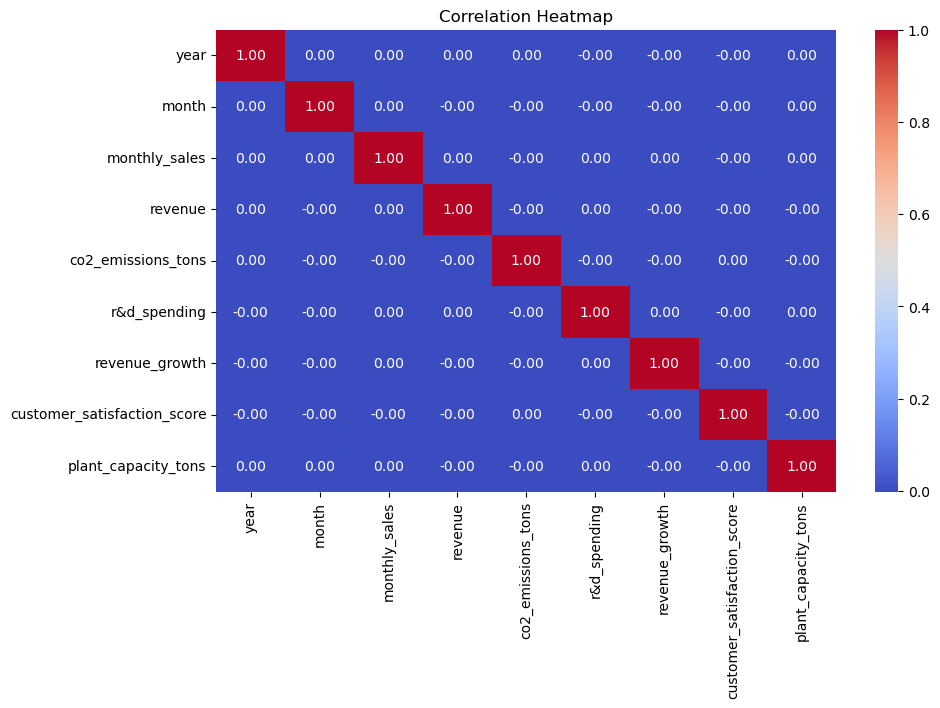

In [26]:
# Step 15: Correlation matrix (for numeric columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Outlier Detection (Using Boxplots)

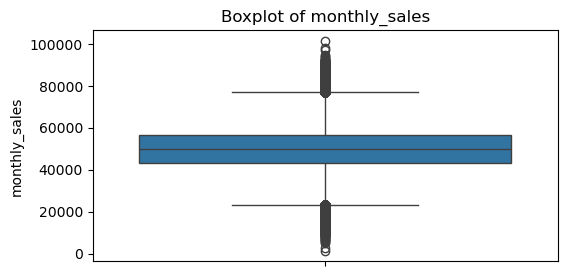

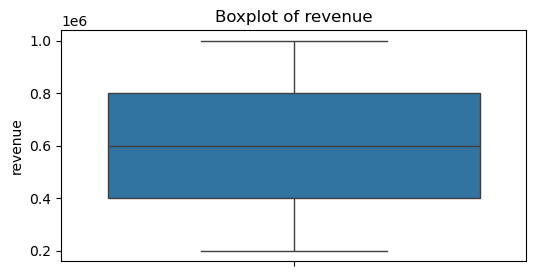

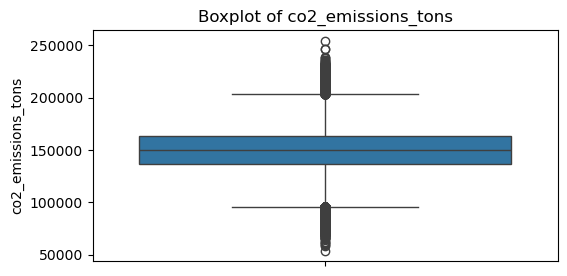

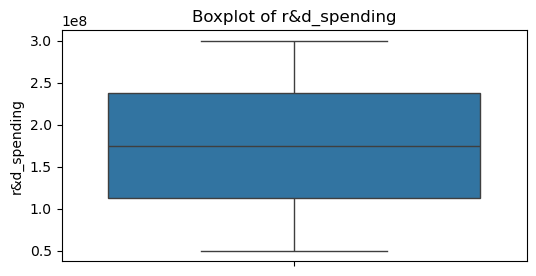

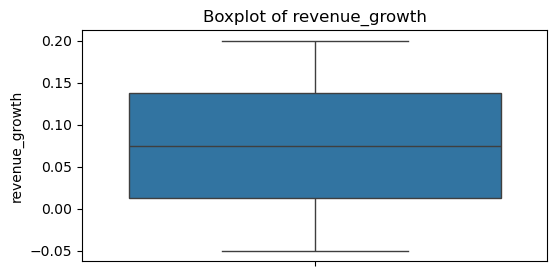

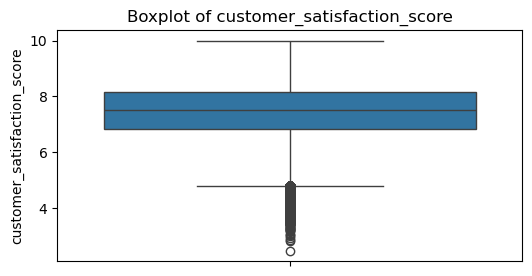

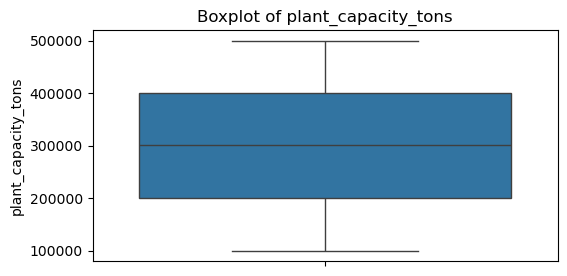

In [36]:
# Step 16: Boxplots to detect outliers

numeric_cols = ['monthly_sales', 'revenue', 'co2_emissions_tons', 'r&d_spending', 
                'revenue_growth', 'customer_satisfaction_score', 'plant_capacity_tons']

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Feature Scaling (Standardization)

In [28]:
# Step 17: StandardScaler for numeric features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

# Optionally convert to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# Basic ML Model (Optional Step)

In [29]:
# Encode target column
df['product_segment_encoded'] = df['product_segment'].astype('category').cat.codes

X = scaled_df  # numeric features
y = df['product_segment_encoded']

In [30]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# Predict & Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.27      0.26     49787
           1       0.25      0.26      0.25     49999
           2       0.25      0.24      0.25     50117
           3       0.25      0.24      0.24     50097

    accuracy                           0.25    200000
   macro avg       0.25      0.25      0.25    200000
weighted avg       0.25      0.25      0.25    200000



# Trend Analysis (Year-Month-wise Revenue)

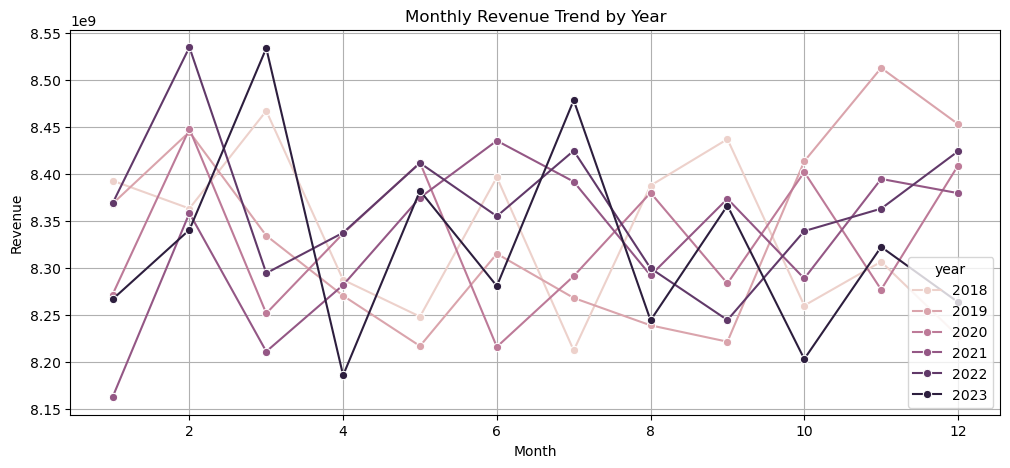

In [32]:
# Step 19: Monthly Revenue Trend

monthly_trend = df.groupby(['year', 'month'])['revenue'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_trend, x='month', y='revenue', hue='year', marker='o')
plt.title("Monthly Revenue Trend by Year")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

# Region-wise Revenue Comparison

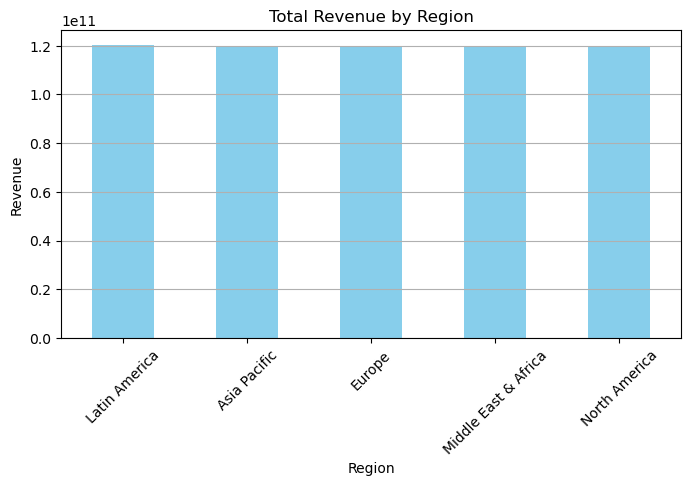

In [33]:
# Step 20: Revenue comparison by region

region_revenue = df.groupby('region')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
region_revenue.plot(kind='bar', color='skyblue')
plt.title("Total Revenue by Region")
plt.ylabel("Revenue")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Crosstab — Plant vs Product Segment

In [34]:
# Plant vs Product Segment distribution

pd.crosstab(df['plant'], df['product_segment'])

product_segment,Additives,Advanced Materials,Chemical Intermediates,Fibers
plant,,,,
Kingsport,35428,35620,35872,35446
Pune,35434,35778,35412,35900
Rotterdam,35861,35987,35439,36011
Shanghai,35671,35555,35771,36086
Singapore,35744,35625,35648,35816
São Paulo,35825,35708,35710,35752
Texas City,35666,35933,35689,35613


# Export Processed Dataset

In [35]:
df.to_csv("Eastman_Cleaned.csv", index=False)
scaled_df.to_csv("Eastman_Scaled.csv", index=False)
print("CSV files saved successfully.")

CSV files saved successfully.
